Question 2)

In [1]:
import selenium
from selenium import webdriver
import pandas as pd
import matplotlib.pyplot as plt
# Path where you save the webdriver 
executable_path = 'C:/Users/bhaku/Desktop/study material/etsy scraper/chromedriver.exe'

# initiator the webdriver for chrome browser
driver = webdriver.Chrome(executable_path=executable_path)
driver.get("https://flightaware.com/live/aircrafttype/")
driver.set_page_load_timeout(3)

aircraft_list=["PC12","C208", "BE20","C56X"]
PC12='pilatus'
C208='cessna_caravan'
BE20='beechcraft'
C56X='cessna_citation'
aircraft_names_list=[PC12,C208,BE20,C56X]
air_dict = dict(zip( aircraft_names_list,aircraft_list))
main_df=pd.DataFrame()
for keys,x in air_dict.items():
    
    df=pd.DataFrame()
    driver.get(f"https://flightaware.com/live/aircrafttype/{x}")
    driver.set_page_load_timeout(3)
    element = driver.find_elements_by_class_name("prettyTable fullWidth")
    
    table =  driver.find_element_by_xpath("//table[@class='prettyTable fullWidth']")
    row1list=[]
    row2list=[]
    for row in table.find_elements_by_xpath(".//tr"):
        row1list.append([td.text for td in row.find_elements_by_xpath(".//td[@class='smallrow1']")])
    
    for row in table.find_elements_by_xpath(".//tr"):
        row2list.append([td.text for td in row.find_elements_by_xpath(".//td[@class='smallrow2']")])
     
    row1list = list(filter(None, row1list)) 
    row2list = list(filter(None, row2list)) 
    
    column_names=['Ident','Type','Origin','Destination','Departure','Estimated Arrival Time','Estimate Time Enroute']
    
    df1 = pd.DataFrame( row1list[0:], columns = column_names)
    df2 = pd.DataFrame( row2list[0:], columns = column_names)
    
    df=pd.concat([df1, df2]).sort_index(kind='merge')
    df["Aircraft Name"]=keys
    main_df=pd.concat([main_df,df])
    





In [2]:

main_df   

,Ident,Type,Origin,Destination,Departure,Estimated Arrival Time,Estimate Time Enroute,Aircraft Name
0,N671PC,PC12,Las Cruces Intl (KLRU),Cavern City Air Trml (KCNM),Wed 10:17PM MDT,Wed 11:01PM MDT,00:44,pilatus
0,N116SK,PC12,Cheyenne Rgnl (KCYS),Casper/Natrona County Intl (KCPR),Wed 10:16PM MDT,Wed 10:50PM MDT,00:34,pilatus
1,N912NM,PC12,El Paso Intl (KELP),Four Corners Rgnl (KFMN),Wed 10:14PM MDT,Wed 11:30PM MDT,01:16,pilatus
1,FD601,PC12,Paynes Find (YPYF),Yalgoo (YLG / YYAL),Thu 12:11PM AWST,Thu 12:52PM AWST,00:22,pilatus
2,SDA655,PC12,Woodbourne (BHE / NZWB),Christchurch Int'l (CHC / NZCH),Thu 05:09PM NZDT,Thu 05:59PM NZDT,00:50,pilatus
2,LBQ825,PC12,Columbia Metropolitan (KCAE),Gwinnett County (KLZU),Thu 12:06AM EDT,Thu 12:54AM EDT,00:40,pilatus
3,FD613,PC12,Geraldton (GET / YGEL),Jandakot (JAD / YPJT),Thu 12:06PM AWST,Thu 01:08PM AWST,00:52,pilatus
3,NDL321,PC12,Quebec/Jean Lesage Int'l (CYQB),Montreal-Trudeau (CYUL),Thu 12:05AM EDT,Thu 12:46AM EDT,00:41,pilatus
4,SKQ34,PC12,Columbia Metropolitan (KCAE),Concord-Padgett Rgnl (KJQF),Thu 12:03AM EDT,Thu 12:50AM EDT,00:24,pilatus
4,N415DL,PC12,Bob Hope (KBUR),Gnoss Field (KDVO),Wed 09:02PM PDT,Wed 10:19PM PDT,01:22,pilatus


In [3]:

main_df['Estimate Time Enroute']= pd.to_datetime(main_df['Estimate Time Enroute'])
main_df2=main_df.dropna()

time = pd.DatetimeIndex(main_df2['Estimate Time Enroute'])
list5=list(time.hour * 60 + time.minute)
main_df2["time_in_minutes"]=list5

D:\pythonanaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


Question 3

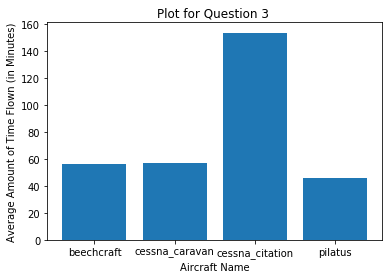

In [4]:
####Plotting####
final_df=main_df2.groupby('Aircraft Name')[['time_in_minutes']].mean()

plt.bar(final_df.index, final_df.time_in_minutes)
plt.ylabel('Average Amount of Time Flown (in Minutes)')
plt.xlabel("Aircraft Name")
plt.title('Plot for Question 3 ')
plt.show()